### Import data

In [1]:
from keras.datasets import reuters

# Dictionary restricted to 10000 most frequenctly found words (sorting done before loading data)
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

# (8982 x num_words, 8982), (2246 x num_words, 2246), each entry a list of integers (word keys).
# there are 45 labels to categorise the inputs.

Using TensorFlow backend.


### Encode data

In [2]:
import numpy as np

def encode_inputs(inp,encoding='one_hot'):
    if encoding == 'one_hot':
        dictionary_max = 10000
        # matrix (len(input) x 10000), each element of input is a vector of one-hot word encodings:
        y = np.zeros((len(inp), dictionary_max), dtype='int')
        for k,word_vctr  in enumerate(inp):
            y[k,word_vctr] = 1
        return y
    elif encoding == 'embedded':
        ## do something ...
        return embedded_encoded
    
def encode_outputs(output):
    n = max(train_labels)
    y = np.zeros((len(output), n),dtype='int')
    for k,label in enumerate(output):
        # `label` is simply a number between 1 and 45 here (note no 0, so index changed below).
        y[k,label-1] = 1
    return y

train_in,train_out = encode_inputs(train_data),encode_outputs(train_labels)
test_in,test_out = encode_inputs(test_data),encode_outputs(test_labels)

### Build the model architecture (Functional API)

In [3]:
from keras import layers
from keras import models
from keras import optimizers

# Note that while the maximum length of each input (ie. number of input nodes) is specified,
# the number of inputs fed in is not (not necessary for network arcitecture), hence the `(num,)`.
input_tensor = layers.Input(shape=(10000,))
hidden1 = layers.Dense(64,activation='relu')(input_tensor)
hidden2 = layers.Dense(64,activation='relu')(hidden1)
output_tensor = layers.Dense(45,activation='softmax')(hidden2) # `softmax` ensures that the sum of outputs = 1 (probability)

model = models.Model(inputs=input_tensor,outputs=output_tensor)
model.compile(optimizer=optimizers.RMSprop(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

'''[10000,64,64,46] densely connected neuron model. As dim(hidden) > dim(outputs), 
the model acts to elucidate patterns in data rather than to attempt to classify properties (like an autoencoder).'''

'[10000,64,64,46] densely connected neuron model. As dim(hidden) > dim(outputs), \nthe model acts to elucidate patterns in data rather than to attempt to classify properties (like an autoencoder).'

### Run the model and provide feedback

In [4]:
partial_in, partial_out = train_in[1000:],train_out[1000:]
validate_in, validate_out = train_in[:1000],train_out[:1000]

epoch_num = 10
history = model.fit(partial_in, partial_out, 
                    epochs = epoch_num, batch_size = 512,
                   validation_data = (validate_in,validate_out))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 180us/step - loss: nan - accuracy: 0.1116 - val_loss: nan - val_accuracy: 0.0460
Epoch 2/10
7982/7982 [==============================] - 1s 172us/step - loss: nan - accuracy: 0.0484 - val_loss: nan - val_accuracy: 0.0460
Epoch 3/10
7982/7982 [==============================] - 1s 166us/step - loss: nan - accuracy: 0.0484 - val_loss: nan - val_accuracy: 0.0460
Epoch 4/10
7982/7982 [==============================] - 1s 122us/step - loss: nan - accuracy: 0.0484 - val_loss: nan - val_accuracy: 0.0460
Epoch 5/10
7982/7982 [==============================] - 1s 119us/step - loss: nan - accuracy: 0.0484 - val_loss: nan - val_accuracy: 0.0460
Epoch 6/10
7982/7982 [==============================] - 1s 124us/step - loss: nan - accuracy: 0.0484 - val_loss: nan - val_accuracy: 0.0460
Epoch 7/10
7982/7982 [==============================] - 1s 127us/step - loss: nan - accuracy: 0.0484 - val_loss:

In [5]:
results = history.history
print(results.keys())

test_results = model.evaluate(test_in,test_out)
print('Test Loss: {0:.2f}, Test Accuracy: {1:.2f}'.format(*test_results))

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
2246/2246 [==============================] - 0s 216us/step
Test Loss: nan, Test Accuracy: 0.05


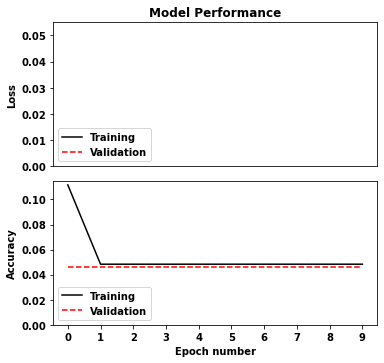

In [6]:
import matplotlib.pyplot as plt

train_loss,train_accuracy = results['loss'],results['accuracy']
val_loss,val_accuracy = results['val_loss'],results['val_accuracy']
epochs = np.arange(epoch_num)

fig = plt.figure(figsize=(3,2))
fig.add_axes((0,0,1.5,1))
plt.title('Model Performance')
plt.plot(epochs,train_loss,'k',label='Training')
plt.plot(epochs,val_loss,'r--',label='Validation')
plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.xticks([])
plt.ylim(bottom=0)
fig.add_axes((0,-1.1,1.5,1))
plt.plot(epochs,train_accuracy,'k',label='Training')
plt.plot(epochs,val_accuracy,'r--',label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch number')
plt.legend(loc='lower left')
plt.xticks(epochs)
plt.ylim(bottom=0)
plt.show()

### Make Predictions

In [7]:
predictions = model.predict(test_in)

def decode_outputs(output):
    y = np.zeros((len(output),len(output[0])))
    decoded_labels = []
    for k,prob_vctr in enumerate(output):
        decoded_labels.append(np.argmax(prob_vctr))
    return np.add(decoded_labels,1) # as labels are 1 to 45, not 0 to 44.

print(decode_outputs(predictions))

[1 1 1 ... 1 1 1]
